In [1]:
!pip install pytesseract pillow


In [13]:
# Loading necessary libraries
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt


In [14]:
# Load the image
image_path = '/Users/fathimazajel/Desktop/image_invoice_processing_data/SROIE2019/0325updated.task1train(626p)/X00016469619.jpg'
image = Image.open(image_path)


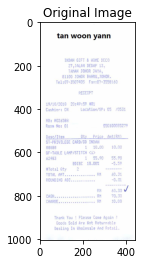

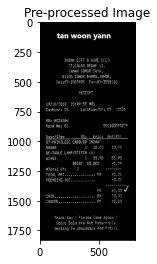

In [11]:


# Display the original image
plt.imshow(image)
plt.axis('on')
plt.title('Original Image')
plt.show()

# Resize the image (optional, only if the image is too big or too small)
base_width = 800
w_percent = base_width / float(image.size[0])
h_size = int(float(image.size[1]) * float(w_percent))
image = image.resize((base_width, h_size), Image.ANTIALIAS)

# Binarization
threshold = 200
image = image.convert('L')
image = image.point(lambda p: p < threshold and 255)

# Display the pre-processed image
plt.imshow(image, cmap='gray')
plt.axis('on')
plt.title('Pre-processed Image')
plt.show()


In [4]:
# Use pytesseract to get bounding boxes
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

# Format the data to match the desired structure
formatted_data = []
for i in range(len(data['text'])):
    # Filtering out entries where no text was detected
    if data['text'][i].strip() != '':
        left, top, width, height = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        
        # Define the four corners of the bounding box
        top_left = (left, top)
        top_right = (left + width, top)
        bottom_right = (left + width, top + height)
        bottom_left = (left, top + height)
        
        line_data = ",".join(map(str, [top_left[0], top_left[1], top_right[0], top_right[1], bottom_right[0], bottom_right[1], bottom_left[0], bottom_left[1], data['text'][i]]))
        formatted_data.append(line_data)

# Convert list to string for final output
final_output = "\n".join(formatted_data)
print(final_output)


141,94,236,94,236,137,141,137,tan
257,103,423,103,423,137,257,137,woon
444,103,587,103,587,152,444,152,yann
206,307,285,307,285,334,206,334,TRDAH
306,306,370,306,370,333,306,333,GIFT
391,306,405,306,405,333,391,333,&
426,307,490,307,490,333,426,333,HOME
511,307,540,307,540,334,511,334,Ee
239,353,282,353,282,388,239,388,27,
293,352,372,352,372,379,293,379,3ALAN
393,352,474,352,474,379,393,379,DEDAP
497,353,539,353,539,386,497,386,13,
239,399,319,399,319,425,239,425,TAMAN
341,397,423,397,423,424,341,424,JOHOR
443,399,522,399,522,432,443,432,JAYA,
187,445,269,445,269,472,187,472,81100
290,443,372,443,372,471,290,471,JOHOR
393,443,488,443,488,478,393,478,BAXRU,
498,444,543,444,543,470,498,470,JOH
135,489,371,489,371,518,135,518,Tel:07-350740%
389,485,393,485,393,528,389,528,9
409,489,540,489,540,516,409,516,Faxs07-3
333,600,371,600,371,608,333,608,Yeu
380,601,404,601,404,607,380,607,od
53,675,219,675,219,703,53,703,19/10/2018
256,673,388,673,388,702,256,702,29:49:59
411,673,456,673,456,701

In [15]:
# Use pytesseract to get bounding boxes for lines
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, config='-c preserve_interword_spaces=1')

# Group by lines using 'block_num' and 'par_num' (paragraph number) and 'line_num'
lines_data = {}
for i in range(len(data['text'])):
    # Filtering out entries where no text was detected
    if data['text'][i].strip() != '':
        key = (data['block_num'][i], data['par_num'][i], data['line_num'][i])
        
        if key not in lines_data:
            lines_data[key] = {
                'left': [],
                'top': [],
                'width': [],
                'height': [],
                'text': []
            }
        
        lines_data[key]['left'].append(data['left'][i])
        lines_data[key]['top'].append(data['top'][i])
        lines_data[key]['width'].append(data['width'][i])
        lines_data[key]['height'].append(data['height'][i])
        lines_data[key]['text'].append(data['text'][i])

# Format the line data to match the desired structure
formatted_data = []
for key, line_data in lines_data.items():
    # Calculate bounding box for the entire line
    left = min(line_data['left'])
    top = min(line_data['top'])
    right = max([sum(x) for x in zip(line_data['left'], line_data['width'])])
    bottom = max([sum(x) for x in zip(line_data['top'], line_data['height'])])
    
    line_text = ' '.join(line_data['text']).strip()
    
    # Define the four corners of the bounding box
    top_left = (left, top)
    top_right = (right, top)
    bottom_right = (right, bottom)
    bottom_left = (left, bottom)
    
    line_annotation = ",".join(map(str, [top_left[0], top_left[1], top_right[0], top_right[1], bottom_right[0], bottom_right[1], bottom_left[0], bottom_left[1], line_text]))
    formatted_data.append(line_annotation)

# Convert list to string for final output
final_output = "\n".join(formatted_data)
print(final_output)


77,52,322,52,322,83,77,83,tan woon yann
113,168,317,168,317,184,113,184,INDAH GIFT & HOKE BECO
131,193,296,193,296,213,131,213,27, JALAN DEDAP 13,
131,218,287,218,287,238,131,238,TANAN JOHOR JAYA,
102,243,324,243,324,263,102,263,81100 JOHOR BAHRU, JOHOR.
74,268,354,268,354,284,74,284,Tel:07-3507405 Fax:07-3558160
177,318,242,318,242,334,177,334,RECEIPT
29,369,250,369,250,386,29,386,19/10/2018 20:49:59 #01
27,395,363,395,363,411,27,411,Cashier: CN Location/SP: 05 /0!
365,395,372,395,372,409,365,409,a
374,395,382,395,382,409,374,409,a
28,446,130,446,130,462,28,462,MB: 4026588
28,470,401,470,401,486,28,486,Room No: Of 050100025279
28,515,371,515,371,543,28,543,Desc/Iten Qty Price Ant/RH)
28,544,271,544,271,561,28,561,ST-PRIVILEGE CARD/GD INDAH
28,569,374,569,374,586,28,586,88888 1 10.00 10.00
28,594,252,594,252,610,28,610,GF-TABLE LAMP/STITCH <i>
28,619,374,619,374,635,28,635,62483 1 55.90 55.90
150,644,374,644,374,659,150,659,@DIsc 10.00% “5.59.
28,670,177,670,177,689,28,689,#Total Qty 4

In [9]:


from pytesseract import Output

# Use pytesseract to get bounding boxes for lines
data = pytesseract.image_to_data(image, output_type=Output.DICT, config='-c preserve_interword_spaces=1')

# Group by lines using 'block_num' and 'par_num' (paragraph number) and 'line_num'
lines_data = {}
for i in range(len(data['text'])):
    # Filtering out entries where no text was detected
    if data['text'][i].strip() != '':
        key = (data['block_num'][i], data['par_num'][i], data['line_num'][i])
        
        if key not in lines_data:
            lines_data[key] = {
                'left': [],
                'top': [],
                'width': [],
                'height': [],
                'text': []
            }
        
        lines_data[key]['left'].append(data['left'][i])
        lines_data[key]['top'].append(data['top'][i])
        lines_data[key]['width'].append(data['width'][i])
        lines_data[key]['height'].append(data['height'][i])
        lines_data[key]['text'].append(data['text'][i])

# Format the line data to match the desired structure
formatted_data = []
for key, line_data in lines_data.items():
    # Calculate bounding box for the entire line
    left = min(line_data['left'])
    top = min(line_data['top'])
    right = max([sum(x) for x in zip(line_data['left'], line_data['width'])])
    bottom = max([sum(x) for x in zip(line_data['top'], line_data['height'])])
    
    line_text = ' '.join(line_data['text']).strip()
    
    # Define the four corners of the bounding box
    top_left = (left, top)
    top_right = (right, top)
    bottom_right = (right, bottom)
    bottom_left = (left, bottom)
    
    line_annotation = ",".join(map(str, [top_left[0], top_left[1], top_right[0], top_right[1], bottom_right[0], bottom_right[1], bottom_left[0], bottom_left[1], line_text]))
    formatted_data.append(line_annotation)

# Convert list to string for final output
final_output = "\n".join(formatted_data)
print(final_output)


141,94,587,94,587,152,141,152,tan woon yann
206,306,540,306,540,334,206,334,TRDAH GIFT & HOME Ee
239,352,539,352,539,388,239,388,27, 3ALAN DEDAP 13,
239,397,522,397,522,432,239,432,TAMAN JOHOR JAYA,
187,443,543,443,543,478,187,478,81100 JOHOR BAXRU, JOH
135,485,540,485,540,528,135,528,Tel:07-350740% 9 Faxs07-3
333,600,404,600,404,608,333,608,Yeu od
53,673,456,673,456,703,53,703,19/10/2018 29:49:59 AOL
50,720,538,720,538,749,50,749,Cashier: CH Location/cF:
51,813,237,813,237,841,51,841,KBs 4O26583
545,307,578,307,578,334,545,334,ca
546,444,590,444,590,470,546,470,OR.
546,509,626,509,626,516,546,516,Wolo
562,719,712,719,712,746,562,746,CS 0071
50,856,731,856,731,886,50,886,Room No: OL OSC IGG0S827¢
52,946,677,946,677,976,52,976,Lesc/Iten Qty Frice AmtiRe)
51,992,494,992,494,1021,51,1021,ST-FRIVILEGE CARD/GH INDAK
52,1037,680,1037,680,1075,52,1075,838683 1 10.09 19.40
51,1082,460,1082,460,1111,51,1111,GF-TABLE LAMP/STITCH <i>
52,1127,681,1127,681,1157,52,1157,62483 { 35.90 58.99
273,1173,